In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import tensorflow as tf
#import tensorflow_hub as hub

from tensorflow import keras
import time

import PIL.Image as Image
import matplotlib.pylab as plt


In [2]:
#load model
# It can be used to reconstruct the model identically.
model = keras.models.load_model("/home/arnold/raindrop-detection-cnn/models/custom_cloud_classification")

(1, 720, 1280, 3)
tf.Tensor(
[[[[209. 226. 242.]
   [209. 226. 242.]
   [209. 226. 242.]
   ...
   [141. 167. 216.]
   [136. 162. 211.]
   [133. 159. 208.]]

  [[209. 226. 242.]
   [209. 226. 242.]
   [209. 226. 242.]
   ...
   [146. 172. 221.]
   [142. 168. 217.]
   [139. 165. 214.]]

  [[209. 226. 242.]
   [209. 226. 242.]
   [209. 226. 242.]
   ...
   [151. 177. 226.]
   [148. 174. 223.]
   [146. 172. 221.]]

  ...

  [[ 55.  49.  33.]
   [ 92.  86.  70.]
   [105.  99.  83.]
   ...
   [ 66.  59.  41.]
   [ 73.  64.  47.]
   [ 75.  66.  49.]]

  [[ 43.  37.  21.]
   [ 66.  60.  44.]
   [ 67.  61.  45.]
   ...
   [ 74.  67.  51.]
   [ 83.  76.  60.]
   [ 76.  69.  53.]]

  [[ 64.  58.  42.]
   [ 71.  65.  49.]
   [ 52.  46.  30.]
   ...
   [ 78.  71.  55.]
   [102.  95.  79.]
   [ 96.  89.  73.]]]], shape=(1, 720, 1280, 3), dtype=float32)
(1, 7)
5
This image most likely belongs to scattered with a 99.94 percent confidence.


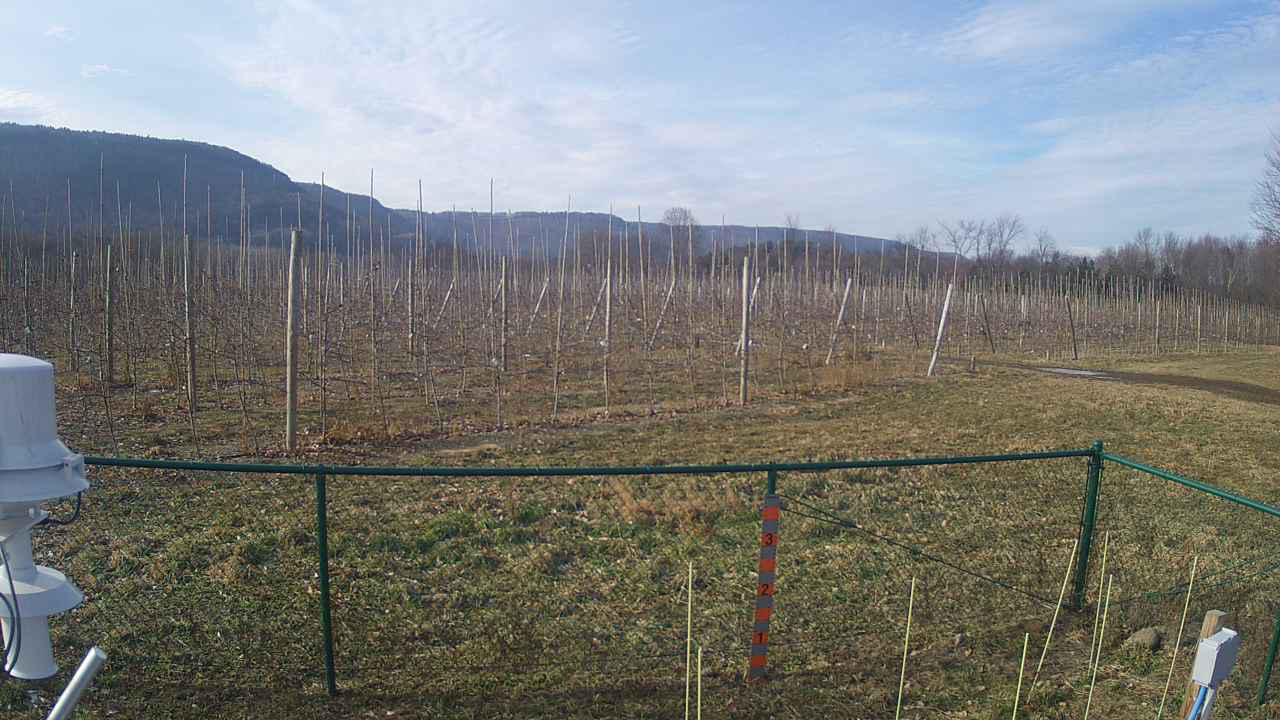

In [3]:
batch_size = 32
img_height = 720
img_width = 1280
class_names = ['clear', 'few', 'night', 'overcast', 'rain', 'scattered', 'snow']
new_img_path = '/home/mesonet/cam_photos/2018/12/20/VOOR/20181220T175030_VOOR.jpg'
#new_img_path = '/home/arnold/raindrop-detection-cnn/mesonet/20161013T164513_YORK.jpg_sliding_window.jpg'

img = keras.preprocessing.image.load_img(
    new_img_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
print(img_array.shape)
print(img_array)
predictions = model.predict(img_array)
print(predictions.shape)
score = tf.nn.softmax(predictions[0])
print(np.argmax(score))
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
Image.open(new_img_path)

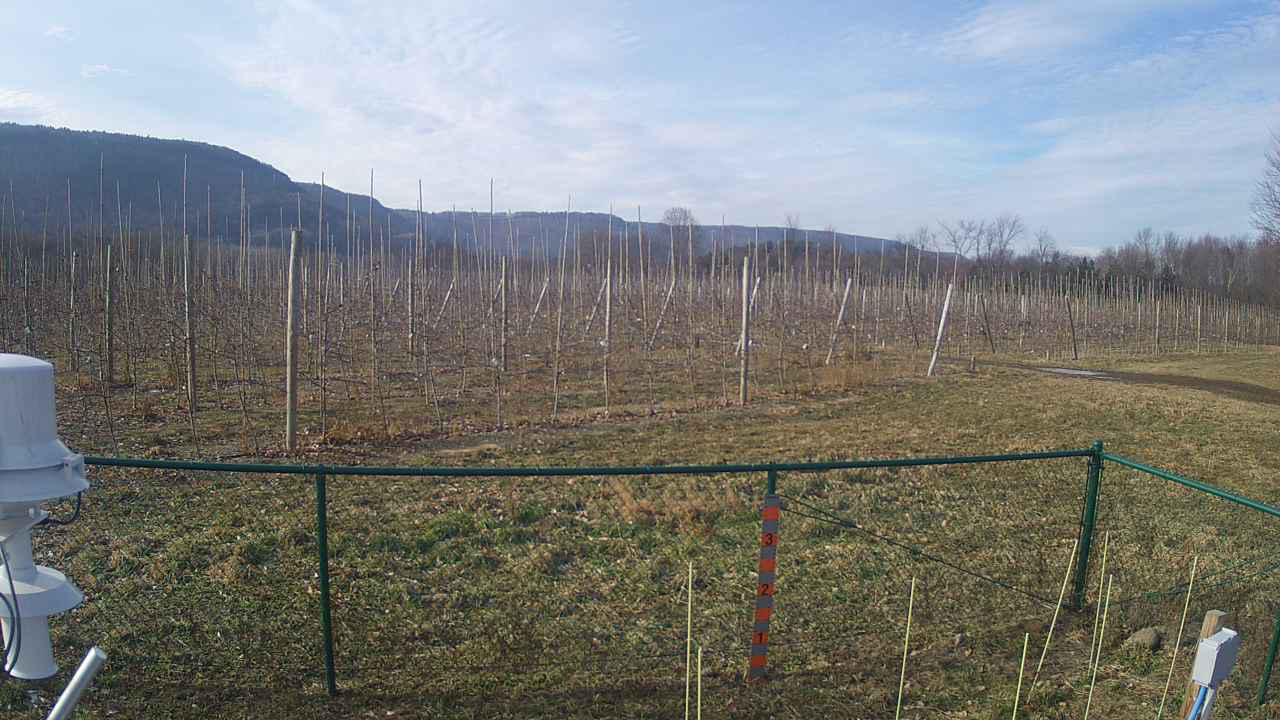

In [4]:
#test image
cloud = Image.open(new_img_path)
cloud

In [5]:
#Add a batch dimension, and pass the image to the model.

cloud = np.array(cloud)/255.0
cloud = cloud[np.newaxis, ...]
print(cloud.shape)
#print(cloud)
result = model.predict(cloud)
# result = model.predict(cloud[np.newaxis, ...])
print(result.shape)

(1, 720, 1280, 3)
(1, 7)


In [6]:
#top class ID can be found with argmax:

predicted_class = np.argmax(result[0], axis=-1)
score = tf.nn.softmax(result[0])
print(predicted_class)
print(class_names[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

3
overcast
This image most likely belongs to overcast with a 100.00 percent confidence.


In [8]:
# plt.imshow(cloud)
# plt.axis('off')
# predicted_class_name = class_names[predicted_class]
# _ = plt.title("Prediction: " + predicted_class_name.title())

In [15]:
import glob
from keras.preprocessing import image
import os

listOfFiles = glob.glob('/home/mesonet/cam_photos/2017/07/*/VOOR/*')
print(len(listOfFiles))
# load all images into a list
# load all images into a list
paths_all = []
images_all = []
for img in listOfFiles[:25]:
#     img = os.path.join(folder_path, img)
#     print(img)
    paths_all.append(img)
    img = image.load_img(img, target_size=(img_height, img_width))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images_all.append(img)
# print(images_all[1])    
images_all = np.vstack(images_all)

classes = model.predict_classes(images_all, batch_size=64)
test_classes = np.argmax(model.predict(images_all), axis=-1)
print(class_names)
print(classes)
print(test_classes)
print(len(classes))

6719
['clear', 'few', 'night', 'overcast', 'rain', 'scattered', 'snow']
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 2 4]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 2 4]
25


In [37]:
new_img_path = '/home/mesonet/cam_photos/2018/12/20/VOOR/20181220T175030_VOOR.jpg'
img = keras.preprocessing.image.load_img(
    new_img_path, target_size=(720, 1280)
)

#cloud = Image.open(new_img_path)

first = np.expand_dims(img, axis=0)
print(first.shape)
result = model.predict(first)

predicted_class = np.argmax(result[0], axis=-1)
# score1 = tf.nn.softmax(result[0])
print('class ',predicted_class)
print(class_names[predicted_class])
# print(
#     "Using numpy image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score1)], 100 * np.max(score1))
# )
print("***********")

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
print(img_array.shape)
predictions2 = model.predict(img_array)
print(predictions2.shape)
score2 = tf.nn.softmax(predictions2[0])

print(np.argmax(score2))
print(
    "Using tensor array image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score2)], 100 * np.max(score2))
)

(1, 720, 1280, 3)
class  4
rain
***********
(1, 720, 1280, 3)
(1, 7)
4
Using tensor array image most likely belongs to rain with a 97.32 percent confidence.


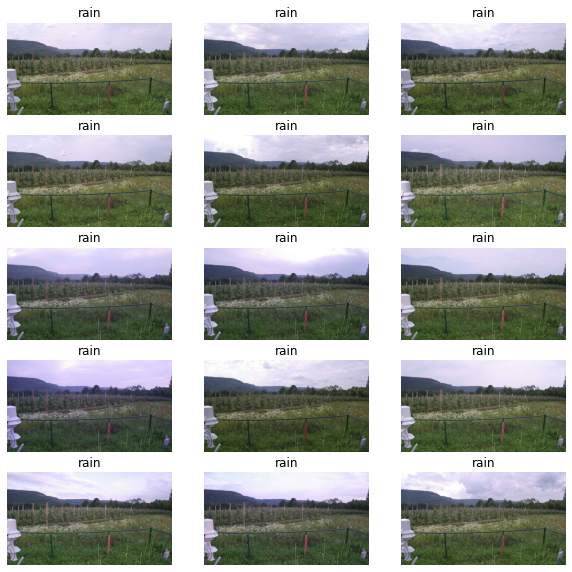

In [12]:
plt.figure(figsize=(10, 10))
for i in range(15):
    ax = plt.subplot(5, 3, i + 1)
    plt.imshow(images_all[i].astype("uint8"))
#     predictions = model.predict(image[i])
#     score = tf.nn.softmax(predictions[0])
#     plt.title(class_names[np.argmax(score)], 100 * np.max(score))
    plt.title(class_names[classes[i]])
    plt.axis("off")

In [ ]:
print(len(class_names))
test_class = np.expand_dims(class_names, axis=0)

print(test_class.shape)
print(test_class)

In [ ]:
frames = np.empty((25, 7))
frames.append(test_class)
frames.shape

In [ ]:
result_batch = model.predict(images)
result_batch.shape


In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(images[n])
    plt.title(class_names[n])
    plt.axis('off')